In [1]:
from __future__ import print_function
from __future__ import absolute_import

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
import sympy as sym

# Interpolación

Hay ocasiones en las que tienes estimaciones para los valores de una función en entradas específicas. Los valores de la función pueden obtenerse de diversas maneras, ya sea a través de experimentos o mediante el uso de otras técnicas de aproximación. Nuestro objetivo en este capítulo es explorar técnicas que nos permitan determinar una nueva función cuyos valores coincidan con las observaciones conocidas en un conjunto de valores de entrada predeterminados. Primero definimos formalmente el término que utilizaremos para describir este proceso.

---

**Definición:** Dado un conjunto discreto de valores $y_i$ en ubicaciones $x_i$, un *interpolante* es una función (por tramos) continua $f(x)$ que pasa exactamente por los datos (*es decir,* $f(x_i) = y_i$).

---

**Ejemplo 0** El polinomio lineal

$$
    P_1(x) = 2(x-1)+3
$$

interpola las coordenadas $(1,3)$ y $(3,7)$.

En general, un polinomio de grado $N$ se puede utilizar para interpolar $N+1$ puntos de datos. Hay muchos tipos diferentes de funciones que se pueden utilizar para interpolar valores, pero aquí nos enfocamos en los polinomios.

## Aplicaciones

- Inputación de datos
- Aproximación de funciones
- Componente fundamental de otros algoritmos
  - Búsqueda de raíces (método de la secante)
  - Optimización, mínimos/máximos (interpolación parabólica sucesiva)
  - Integración y diferenciación numérica
  - Método numericos para solucionar ecuaciónes diferenciales

## Interpolación Polinomial

**Teorema:** Existe un polinomio *único* de grado $N$, $P_N(x)$, que pasa exactamente por $N + 1$ valores $y_1, y_2, \ldots, y_N, y_{N+1}$ en puntos *distintos* $x_1, x_2, \ldots, x_N, x_{N+1}$.

Esto es una consecuencia del número de incógnitas en $P_N(x)$.

#### Ejemplo 1: 2 Puntos

Los puntos dados son $(x_0, y_0)$ y $(x_1, y_1)$, lo que dará lugar a una línea:

Definimos $P_1(x) = p_1 x + p_0$ y utilizamos los dos puntos para encontrar $p_0$ y $p_1$:

Primero, notamos que tenemos dos ecuaciones y dos incógnitas. Las dos ecuaciones se pueden encontrar asumiendo que la función $P_1(x)$ interpola los dos puntos de datos:

$$
    \begin{align}
       y_0 &= p_1 x_0 + p_0, \\
       y_1 &= p_1 x_1 + p_0.
    \end{align}
$$

En este ejemplo, resolveremos la primera ecuación para $p_0$, sustituiremos el resultado en la segunda ecuación y luego resolveremos para $p_1$.

$$
y_0 = p_1 x_0 + p_0 \quad \Rightarrow \quad p_0 = y_0 - p_1 x_0
$$

$$\begin{aligned}
    y_1 &= p_1 x_1 + p_0 & \Rightarrow \\
    y_1 &= p_1 x_1 + y_0 - p_1 x_0 & \Rightarrow \\
    p_1 &= \frac{y_1 - y_0}{x_1 - x_0} & \Rightarrow \\
    p_0 &= y_0 - \frac{y_1 - y_0}{x_1 - x_0} x_0 &
\end{aligned}$$

$$P_1(x) = \frac{y_1 - y_0}{x_1 - x_0} x + y_0 - \frac{y_1 - y_0}{x_1 - x_0} x_0 = \frac{y_1 - y_0}{x_1 - x_0} (x - x_0) + y_0$$

#### Ejemplo 2: 3 Puntos

Los puntos dados son $(x_0, y_0)$, $(x_1, y_1)$ y $(x_2, y_2)$, lo que dará lugar a un polinomio cuadrático:

Definimos $P_2(x) = p_0 x^2 + p_1 x + p_2$, lo que lleva a las siguientes ecuaciones:

$$y_0 = p_2 x_0^2 + p_1 x_0 + p_0$$

$$y_1 = p_2 x_1^2 + p_1 x_1 + p_0$$

$$y_2 = p_2 x_2^2 + p_1 x_2 + p_0$$

¡Esto se complica rápidamente! Observa que tenemos tres ecuaciones y tres incógnitas, y el sistema anterior es un sistema lineal de tres ecuaciones. En general, el problema se reducirá a un sistema lineal

$$ 
    A(\mathbf{x})\mathbf{p} = \mathbf{y}
$$

Más adelante exploraremos un enfoque más general para resolver el sistema, pero primero es importante determinar si el sistema tiene una solución.

### Demostración - Unicidad de los Interpolantes Polinomiales

Sea

$$\mathcal{P}_N(x) = \sum^N_{n=0} p_n x^n$$

o

$$\mathcal{P}_N(x) = p_0 + p_1 x + \cdots + p_{N - 1} x^{N - 1} + p_{N} x^N$$

y $\mathcal{P}_N(x_i) = y_i$ para $i = 0, 1, \ldots, N$ y que $x_i \neq x_j ~~~ \forall i, j$.

### Preliminares: Base Monomial

Podemos pensar en $\mathcal{P}_N(x) = \sum^N_{n=0} p_n x^n$ como un polinomio, o más fundamentalmente como una *combinación lineal* de un conjunto de funciones más simples, los monomios

$$1, x, x^2, x^3, \ldots, x^{N-1}, x^N$$ 

con pesos

$$p_0, p_1, p_2, p_3, \ldots, p_{N-1}, \text{y } p_N$$

respectivamente.

### Independencia lineal de los Monomios

Los monomios forman un conjunto de funciones *linealmente independientes*, de manera que ningún monomio $x^n$ puede escribirse como una combinación lineal de cualquier otro monomio. Podemos ver esto gráficamente para los primeros monomios.

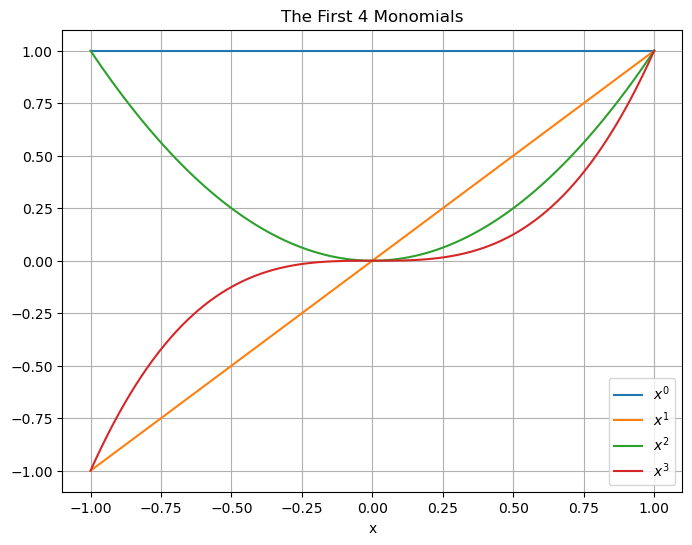

In [3]:
x = np.linspace(-1,1,100)
fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(1,1,1)
for n in range(4):
    axes.plot(x,x**n,label='$x^{}$'.format(n))
axes.set_xlabel('x')
axes.grid()
axes.legend(loc='best')
axes.set_title('The First 4 Monomials')
plt.show()

Pero más fundamentalmente, un conjunto de funciones es linealmente independiente si la única combinación lineal que suma para formar la función cero, por ejemplo:

$$
    P_N(x) = p_0 1 + p_1 x + p_2 x^2 + \ldots + p_n x^n = 0
$$

es cuando todos los coeficientes $p_i = 0$, $\forall i=0,\ldots,N$.

**Teorema**: Los monomios $x^0, \ldots, x^n$ son linealmente independientes.

**Demostración**: Consideremos $P_N(x) = 0$ para todo $x$. Dado que los polinomios (y monomios) son diferenciables al menos $n$ veces, diferenciamos $n$ veces para obtener

$$
    P^{(n)}_N(x) = n!p_n = 0
$$ 

lo que implica que $p_n = 0$.

Usando este resultado y diferenciando $n-1$ veces, obtenemos que $p_{n-1} = 0$, lo que por inducción nos da que todos los $p_i = 0$.

Dicho de otra manera, el único polinomio de grado $n$ que es cero en todas partes es aquel en el que todos los coeficientes son cero.

#### El Teorema Fundamental del Álgebra

Todo polinomio de grado $n$ tiene exactamente $n$ raíces complejas, es decir,

$$
    P_N(x) = (x - a_1)(x - a_2)\ldots(x - a_n)
$$

donde $a_i \in \mathbb{C}$. Por lo tanto, un polinomio no trivial de grado $n$ solo puede ser cero en $n$ puntos.

### Demostración - Unicidad de los Interpolantes Polinomiales

Sea 

$$\mathcal{P}_N(x) = \sum^N_{n=0} p_n x^n $$

el **interpolante** de los $N+1$ puntos $y_i$ en $x_i$.

Es decir,

$$\mathcal{P}_N(x_i) = y_i,\quad \text{para}\quad i=0,1,\ldots,N$$

y $x_i \neq x_j \quad\forall i,j$.

Supongamos que existe otro polinomio

$$Q_N(x) = \sum^N_{n=0} q_n x^n$$

que pasa por el mismo conjunto de puntos tal que $Q_N(x_i) = y_i$. Ahora, calculemos 

$$T_N(x) = \mathcal{P}_N(x) - Q_N(x):$$

Ahora, por construcción, $T_N(x_i) = 0$, lo que implica que es igual a cero en $n+1$ puntos. Sin embargo,

$$T_N(x) = \mathcal{P}_N(x) - Q_N(x) = \sum^N_{n=0} p_n x^n - q_n x^n = \sum^N_{n=0} (p_n - q_n) x^n$$

es un polinomio de orden $n$ que tiene como máximo $n$ raíces reales. La única forma de reconciliar esto es si $T_n(x) = 0$, para todo $x$, y por lo tanto $p_n - q_n = 0$ individualmente, lo que implica que $\mathcal{P}_N(x) = Q_N(x)$.


El problema de interpolación o de predecir funciones a partir de un número determinado de datos representativos de la función aparece con bastante frecuencia en la interpretación de datos experimentales. De otro lado, las técnicas de aproximación de funciones por medio de métodos de interpolación son la base para la formulación de los métodos más importantes de la mecánica computacional como lo son los elementos finitos y los elementos de frontera. En este Notebook se discutirán algunos aspectos básicos y fundamentales de la teoría de interpolación. El notebook se describe en términos del desarrollo completo de un problema ejemplo incluyendo su implementación en Python.

## Interpolación de Lagrange


El problema de interpolación consiste en la determinación del valor de una función $f(x)$ en un punto arbitrario $x \in [x_1, x_n]$, dados valores conocidos de la función al interior de un dominio de solución. De acuerdo con el teorema de interpolación de Lagrange la aproximación $\hat f(x)$ a la función $f(x)$ se construye como:

\begin{equation}
\hat{f}(x) = \sum_{I=1}^n L_I(x) f_I
\end{equation}

donde $L_I$ es el $I-$ésimo polinomio de orden $n-1$ y $f_1, f_2, \cdots, f_n$ son los $n$ valores conocidos de la función. El $I-$ésimo polinomio de Lagrange se calcula siguiendo la siguiente expresión:

\begin{equation}
{L_I}(x) = \prod_{J=1, J \ne I}^{n} \frac{(x - x_J)}{(x_I - x_J)}\, .
\end{equation}

### Primera derivada

En varios problemas de ingeniería es necesario usar técnicas de interpolación para encontrar valores de las derivadas de la variable primaria o principal. Por ejemplo, Considerando que solo se dispone de valores discretos de la varible de entrada se tiene que las derivadas que se requieren se pueden encontrar usando estos valores discretos. Lo anterior equivale a derivar $\hat{f}(x)$ directamente como sigue:


\begin{equation}
\frac{\mathrm{d}\hat{f}}{\mathrm{d}x}=\frac{\mathrm{d}L_I(x)}{\mathrm{d}x}f_I
\end{equation}

Haciendo,

$$B_I(x) = \frac{\mathrm{d}L_I(x)}{\mathrm{d}x}\, ,$$

podemos escribir el esquema de interpolación como:

\begin{equation}
\frac{\mathrm{d}\hat{f}}{\mathrm{d}x} = \sum_{I=1}^n B_I(x) f_I\, .
\end{equation}

## Ejemplo





Formule un esquema de interpolación para encontrar un valor de la función

\begin{equation}
f(x) = x^3 + 4x^2 - 10
\end{equation}

en un punto arbitrario $x$ en el intervalo $[ -1, 1]$ asumiendo que se conoce el valor exacto de la función en los puntos $x=-1.0$, $x=+1.0$ y $x=0.0.$

En este ejemplo se conoce la función y aparentemente no tiene mucho sentido buscar una aproximación de la misma resolviendo un problema de interpolación. Sin embargo es conveniente seleccionar una función conocida para poder asimilar el problema numérico y sus limitaciones. En este contexto asumiremos que en una aplicación real conocemos los valores de la función en un conjunto de puntos $x=-1.0$, $x=+1.0$ and $x=0.0$ los cuales se denominan puntos nodales o simplemente _nodos_.

El proceso de interpolación involucra 2 pasos fundamentales: 

1. Determinar los polinomios de interpolación $L_I$ usando la productoria.

2. Usar la combinación lineal para construir el polinomio interpolante o la aproximación a la función $\hat f(x)$.

Veamos estos pasos entonces.

1. Considerando que tenemos 3 puntos _nodales_ necesitamos generar 3 polinomios de interpolación de segundo orden, cada uno de ellos asociado a cada punto nodal. Rotulemos los _nodos_ como $x_0 = -1.0$, $x_1 = +1.0$ y $x_2 = 0.0$. De acuerdo con esta denominación $L_0(x)$, $L_1(x)$ y $L_2(x)$ serán los polinomios de interpolación de segundo orden asociados a los puntos nodales $x_0 = -1.0$, $x_1 = +1.0$ y $x_2 = 0.0$. Usando la fórmula de la productoria tenemos:

\begin{align}
&L_0(x) = \frac{(x - x_1)(x - x_2)}{(x_0 - x_1)(x_0 - x_2)} \equiv \frac{1}{2}(x - 1.0)x\\
&L_1(x) = \frac{(x-x^0)(x-x^2)}{(x^1-x^0)(x^1-x^2)}\equiv\frac12(x+1.0)x\\
&L_2(x) = \frac{(x-x^0)(x-x^1)}{(x^2-x^0)(x^2-x^1)}\equiv-(x+1.0)(x-1.0)\, .
\end{align}

2. Para llegar a la aproximación final de la función realizamos la combinación lineal:

\begin{equation}
\hat{f}(x) = L_0(x)f_0 + L_1(x)f_1 + L_2(x)f_2
\end{equation}

- Verificar que los polinomios de interpolación $L_0(x)$, $L_1(x)$ y $L_2(x)$ satisfacen la propiedad

$$L_I(x_J)= \delta_{IJ} \equiv \begin{cases}
1\quad \text{si } I=J\\
0\quad \text{si } I\neq J
\end{cases}\, .$$

## Solución en Python



En los siguientes bloques de código mostramos el paso a paso en la construcción del polinomio de interpolación final $f(x)$ usando Python. Para seguir el Notebook se recomienda que de manera simultánea se implementen los bloques de código en un script independiente o que añada comentarios a las instrucciones más relevantes.

### Paso 1: Importación de módulos


En la escritura de scripts en Python es necesario importar **módulos** o bibliotecas (algunas personas usan la palabra _librería_ como mala traducción de _library_ del inglés) que contienen funciones de Python predefinidas. En este caso importaremos los **módulos**:

* `numpy` el cual es una biblioteca de funciones para realizar operaciones con matrices similar a Matlab.
* `matplotlib` el cual es una biblioteca de graficación.
* `scipy` el cual es una biblioteca fundamental para computación científica.
* `sympy` el cual es una biblioteca para realizar matemáticas simbólicas.

Python importa los módulos usando la palabra reservada `import` seguida del nombre del módulo y un nombre corto para ser usado como prefijo en referencias posteriores a las funciones contenidas en ese módulo.

### Paso 2: Definición de una función para determinar los polinomios de interpolación de Lagrange



En un programa de computador una **función** (o también llamada **subrutina**) es un bloque de código que realiza una tarea específica múltiples veces dentro de un programa o probablemente en diferentes programas. En Python estas funciones se definen por medio de la palabra clave `def` seguida del nombre dado a la función.

Conjuntamente con el nombre, encerrado entre paréntesis, la definición de la función debe incluir también una lista de parámetros (o argumentos) a ser usados por la función cuando esta realice tareas especificas.

En el ejemplo definiremos una función de Python para generar el polinomio de Lagrange usando la productoria definida previamente. Le daremos a esta función el nombre `lagrange_poly`. Sus parámetros de entrada serán la variable independiente $x$ a ser usada en el polinomio; el orden del polinomio definido por `order`; y el punto `i` asociado al polinomio. La función será usada posteriormente desde el programa principal.

In [5]:
def lagrange_poly(x, order, i, xi=None): 
    if xi == None:
        xi = sym.symbols('x:%d'%(order+1))
    index = list(range(order+1))
    index.pop(i)
    return sym.prod([(x - xi[j])/(xi[i] - xi[j]) for j in index])

Alternativamente a la definición de una función usando la palabra clave `def` Python también permite la definición de funciones en el sentido del Calculo, es decir definición de relaciones que permiten  transformar escalares o vectores en otros escalares o vectores. Esto es posible a través de la opción `lambda`. En este ejemplo usaremos la opción `lambda` para crear la función:

\begin{equation}
f(x)=x^3+4x^2-10.
\end{equation}


In [6]:
fun = lambda x: x**3 + 4.0*x**2 - 10.0

Una vez creada la función $f(x)$ usando la opción `lambda` pasamos a definir un conjunto de puntos de evaluación. El numero de puntos se define por medio de la variable `npts` y usamos la función `linspace` del módulo `numpy` para crear una distribución equidistante de puntos entre $x = -1.0$ y $x = +1.0.$ Simultáneamente, el arreglo nulo `yy` almacenará los valores de la función en los puntos almacenados en `xx`.

Note que Python inicia desde la posición 0 el conteo de elementos en arreglos y otras estructuras de datos, de manera que empezamos a contar desde cero para mantener la consistencia con la implementación.

In [7]:
npts = 200
x_pts = np.linspace(-1, 1, npts)

Con la función ahora disponible podemos calcular los valores (conocidos) listos para ser usados en el esquema de interpolación. Estos valores se almacenarán en el arreglo `fd()`. Para calcular cada valor de la función usamos el comando (ya disponible) `fun` correspondiente al nombre que usamos en la declaración de la función usando la opción `lambda`.


In [8]:
pts = np.array([-1, 1, 0])
fd = fun(pts)

Ahora evalúe la función en los `npts` puntos y grafique la misma:

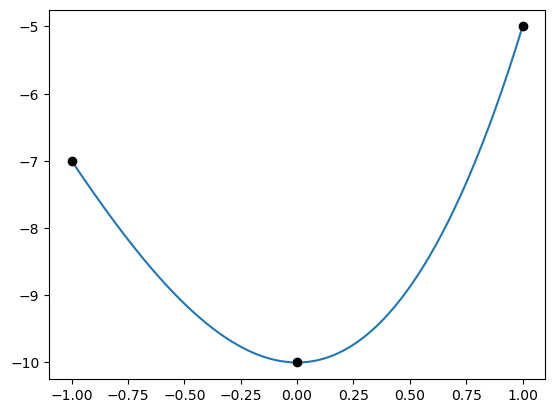

In [9]:
plt.figure()
y_pts = fun(x_pts)
plt.plot(x_pts , y_pts)
plt.plot(pts, fd, 'ko')

### Paso 3: Encontrando los polinomios de interpolación de Lagrange



Calculemos ahora los polinomios de Lagrange invocando la función `lagrange_poly()`. Crearemos una lista vacía que llamaremos `pol` y cada que determinemos un nuevo polinomio lo adicionaremos a la lista usando para ello el método `.append()`. En ese momento los polinomios almacenados en la lista `pol=[]` existirán en notación simbólica (como si estuviéramos resolviendo el problema a mano) y estarán listos para ser evaluados en valores específicos de $x$.

In [11]:
x = sym.symbols('x')                                       
pol = []                                                
pol.append(sym.simplify(lagrange_poly(x, 2, 0, [-1,1,0])))  
pol.append(sym.simplify(lagrange_poly(x, 2, 1, [-1,1,0])))
pol.append(sym.simplify(lagrange_poly(x, 2, 2, [-1,1,0])))
pol

[x*(x - 1)/2, x*(x + 1)/2, 1 - x**2]

El método `subs` del módulo `sympy` substituye el valor de la variable independiente $x$ por el valor almacenado en $xx[i]$.

**Tarea Opcional:** Corregir las siguientes tres celdas de código

In [12]:
plt.figure()
                      
for k in range(3):
    for i in range(npts):
        yy[i] = pol[k].subs([(x, xx[i])])   
    plt.plot(xx, yy)

NameError: name 'xx' is not defined

<Figure size 640x480 with 0 Axes>

### Paso 4: Encontrando el polinomio de interpolación para aproximar la función  $f(x)$



Construyamos ahora el polinomio de aproximación completo $\hat f(x)$ de acuerdo con la superposición lineal

$$\hat{f}(x) = L_0(x)f(x_0) + L_1(x) f(x_1) +  L_2(x) f(x_2)\, ,$$


y utilizando la lista (ya disponible) `pol` que almacena los 3 polinomios generados. Solo para efectos de ilustrar primero lo mostramos con `display`. La versión evaluada de $\hat{f}(x)$ será almacenada en el arreglo `yy[i]`.

In [13]:
display(pol[0]*fd[0] + pol[1]*fd[1] + pol[2]*fd[2])

10.0*x**2 - 3.5*x*(x - 1) - 2.5*x*(x + 1) - 10.0

In [14]:
plt.figure()                                                                      
for i in range(npts):
    yy[i] = fd[0]*pol[0].subs([(x, xx[i])]) + fd[1]*pol[1].subs([(x, xx[i])]) \
            + fd[2]*pol[2].subs([(x, xx[i])])

zz = fun(xx)
plt.plot([-1, 1, 0], fd, 'ko')
plt.plot(xx, yy , 'r--')
plt.plot(xx, zz)

NameError: name 'xx' is not defined

<Figure size 640x480 with 0 Axes>

Note que debido a la diferencia en orden entre la aproximación $\hat{f}(x)$ y la función $f(x)$  el polinomio de interpolación no coincide completamente con la función aunque si reproduce los valores correctos en los puntos nodales.

### Paso 5: Encontrando las derivadas


Usemos la opción `lambda` una vez más para definir una nueva función `fdx`correspondiente a la primera derivada:

$$f'(x) = 3x^2 + 8x\, .$$

Las derivadas en los puntos nodales se almacenarán en el arreglo `fc`

In [ ]:
fdx = lambda x: 3*x**2+8.0*x
fc = np.array([fdx(-1.0), fdx(1.0) ,fdx(0.0)])

La interpolación de las derivadas se calculan de acuerdo con

\begin{equation}
\hat{f}'(x) = \frac{\mathrm{d}L_0(x)}{\mathrm{d}x} f_0 + \frac{\mathrm{d}L_1(x)}{\mathrm{d}x} f_1 + \frac{\mathrm{d}L_2(x)}{\mathrm{d}x} f_2\, .
\end{equation}

In [ ]:
dpol = []
dpol.append(sym.diff(pol[0],x))     
dpol.append(sym.diff(pol[1],x))
dpol.append(sym.diff(pol[2],x))
display(dpol)
display(dpol[0]*fd[0] + dpol[1]*fd[1] + dpol[2]*fd[2])

plt.figure()
yy= fdx(xx)
plt.plot(xx, yy ,'r--')
plt.plot([-1, 1, 0], fc, 'ko')

for i in range(npts):
    yy[i] = fd[0]*dpol[0].subs([(x, xx[i])]) + fd[1]*dpol[1].subs([(x, xx[i])])\
            + fd[2]*dpol[2].subs([(x, xx[i])]) 
plt.plot(xx, yy)

## Ajuste de Ecuaciones No Lineales

**Enunciado del problema.** Ajustar una curva para la siguiente serie de valores de entrada $x$:

`[80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280]`

y la siguiente serie de valores respuesta $y$:

`[4.98e-02, 1.22e+01, 3.65e+02, 4.02e+03, 2.43e+04, 6.62e+04, 1.47e+05, 2.68e+05, 8.91e+05, 9.85e+05, 1.62e+06]`

**Solución.** Asumamos que la ecuación está dada por:

$$
\ln y(x) = \dfrac{A}{x} + B,
$$

donde $A, B$ son constantes.

También podemos escribir la ecución en forma exponencial:

$$
y(x) = \exp\left(\dfrac{A}{x} + B\right).
$$

### Implementación: Ajuste de curva usando `scipy.optimize.curve_fit()`

En este enfoque, utilizamos [`scipy.optimize.curve_fit()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) para ajustar directamente la forma exponencial.


In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import minimize

In [48]:
# definir los puntos
x = np.array([80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280])
y = np.array([4.98e-02, 1.22e+01, 3.65e+02, 4.02e+03, 2.43e+04, 6.62e+04, 1.47e+05, 2.68e+05, 8.91e+05, 9.85e+05, 1.62e+06])

In [49]:
def ecn(x, A, B):
    '''Exponential form of the Clausius-Clapeyron equation'''
    return np.exp(A/x + B)

In [50]:
# usar scipy.optimize.curvefit()
popt, pcov = curve_fit(ecn, x, y)
popt

array([-1477.20171372,    19.5710549 ])

In [51]:
# definimos la curve de ajuste
x_fit = np.arange(60, 300, 10)
y_fit = ecn(x_fit, *popt)

In [52]:
# plot settings
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.rcParams.update({
    'font.family': 'Arial',  # Times New Roman, Calibri
    'font.weight': 'normal',
    'mathtext.fontset': 'cm',
    'font.size': 18,
    
    'lines.linewidth': 2,
    
    'axes.linewidth': 2,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.titleweight': 'bold',
    'axes.titlesize': 18,
    'axes.labelweight': 'bold',
    
    'xtick.major.size': 8,
    'xtick.major.width': 2,
    'ytick.major.size': 8,
    'ytick.major.width': 2,
    
    'figure.dpi': 80,
    
    'legend.framealpha': 1, 
    'legend.edgecolor': 'black',
    'legend.fancybox': False,
    'legend.fontsize': 14
})

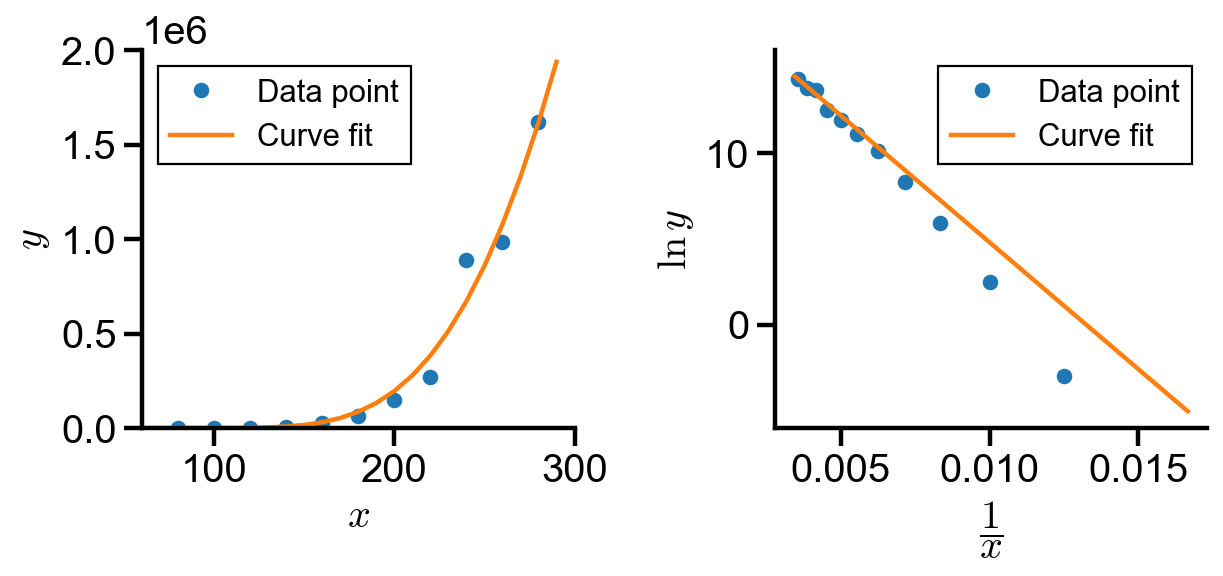

In [53]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].plot(x, y, 'o', label='Data point')
axs[0].plot(x_fit, y_fit, label='Curve fit')
axs[0].set_xlabel('$x$')
axs[0].set_ylabel('$y$')
axs[0].set_xlim(60, 300)
axs[0].set_ylim(0, 2e6)
axs[0].ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
axs[0].legend()

axs[1].plot(1/x, np.log(y), 'o', label='Data point')
axs[1].plot(1/x_fit, np.log(y_fit), label='Curve fit')
axs[1].set_xlabel('$\dfrac{1}{x}$')
axs[1].set_ylabel('$\ln y$')
axs[1].set_ylim(top=16)
axs[1].legend()


plt.tight_layout()

Al inspeccionar la forma lineal, el ajuste de la curva no siguió de la mejor manera la tendencia a medida que $\dfrac{1}{x}$ aumenta.

### Forma Lineal
En este enfoque, utilizamos [`scipy.optimize.curve_fit()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) para ajustar la forma linealizada.


In [54]:
def ecn_lineal(x, A, B):
    '''Linear form of the equation'''
    return A*x + B

In [55]:
# use scipy.optimize.curvefit()
popt, pcov = curve_fit(ecn_lineal, 1/x, np.log(y))
popt

array([-1915.93999623,    21.54152215])

In [58]:
# define curve fit line
inv_x_fit = 1/np.arange(60, 300, 10)
ln_y_fit = ecn_lineal(1/x_fit, *popt)

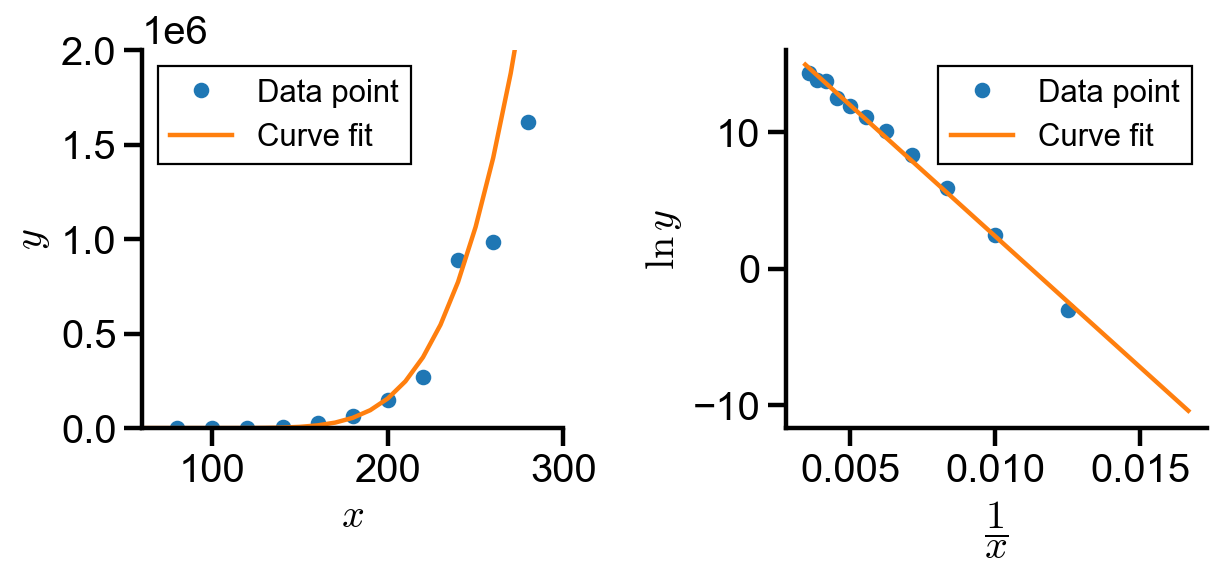

In [59]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].plot(x, y, 'o', label='Data point')
axs[0].plot(1/inv_x_fit, np.exp(ln_y_fit), label='Curve fit')
axs[0].set_xlabel('$x$')
axs[0].set_ylabel('$y$')
axs[0].set_xlim(60, 300)
axs[0].set_ylim(0, 2e6)
axs[0].ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
axs[0].legend()

axs[1].plot(1/x, np.log(y), 'o', label='Data point')
axs[1].plot(inv_x_fit, ln_y_fit, label='Curve fit')
axs[1].set_xlabel('$\dfrac{1}{x}$')
axs[1].set_ylabel('$\ln y$')
axs[1].set_ylim(top=16)
axs[1].legend()

plt.tight_layout()

###  Exploren el ajuste de curvas usando `minimize()`

En este enfoque, deben utilizar [`scipy.optimize.minimize()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) para minimizar la suma de los residuos al cuadrado de la ecución en forma exponencial.
